# Loan Prediction: Binary Classification using Logistic Regression

## Phase 1: Setup

In [122]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('train.csv',on_bad_lines='skip')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
# states the number of entries, number of columns, and number of 
#      entries in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Phase 2: Data Cleaning

In [125]:
# states the number of null values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
# replace null values in "LoanAmount" with mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
# replace null values in "Credit_History" with median
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [127]:
# check that there are no null values in "LoanAmount" and "Credit_History"
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [128]:
df.dropna(inplace=True)

In [129]:
# check that there are no null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [130]:
# number of data entries
df.shape

(542, 13)

## Phase 3: Exploratory Data Analysis/Data Visualization

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

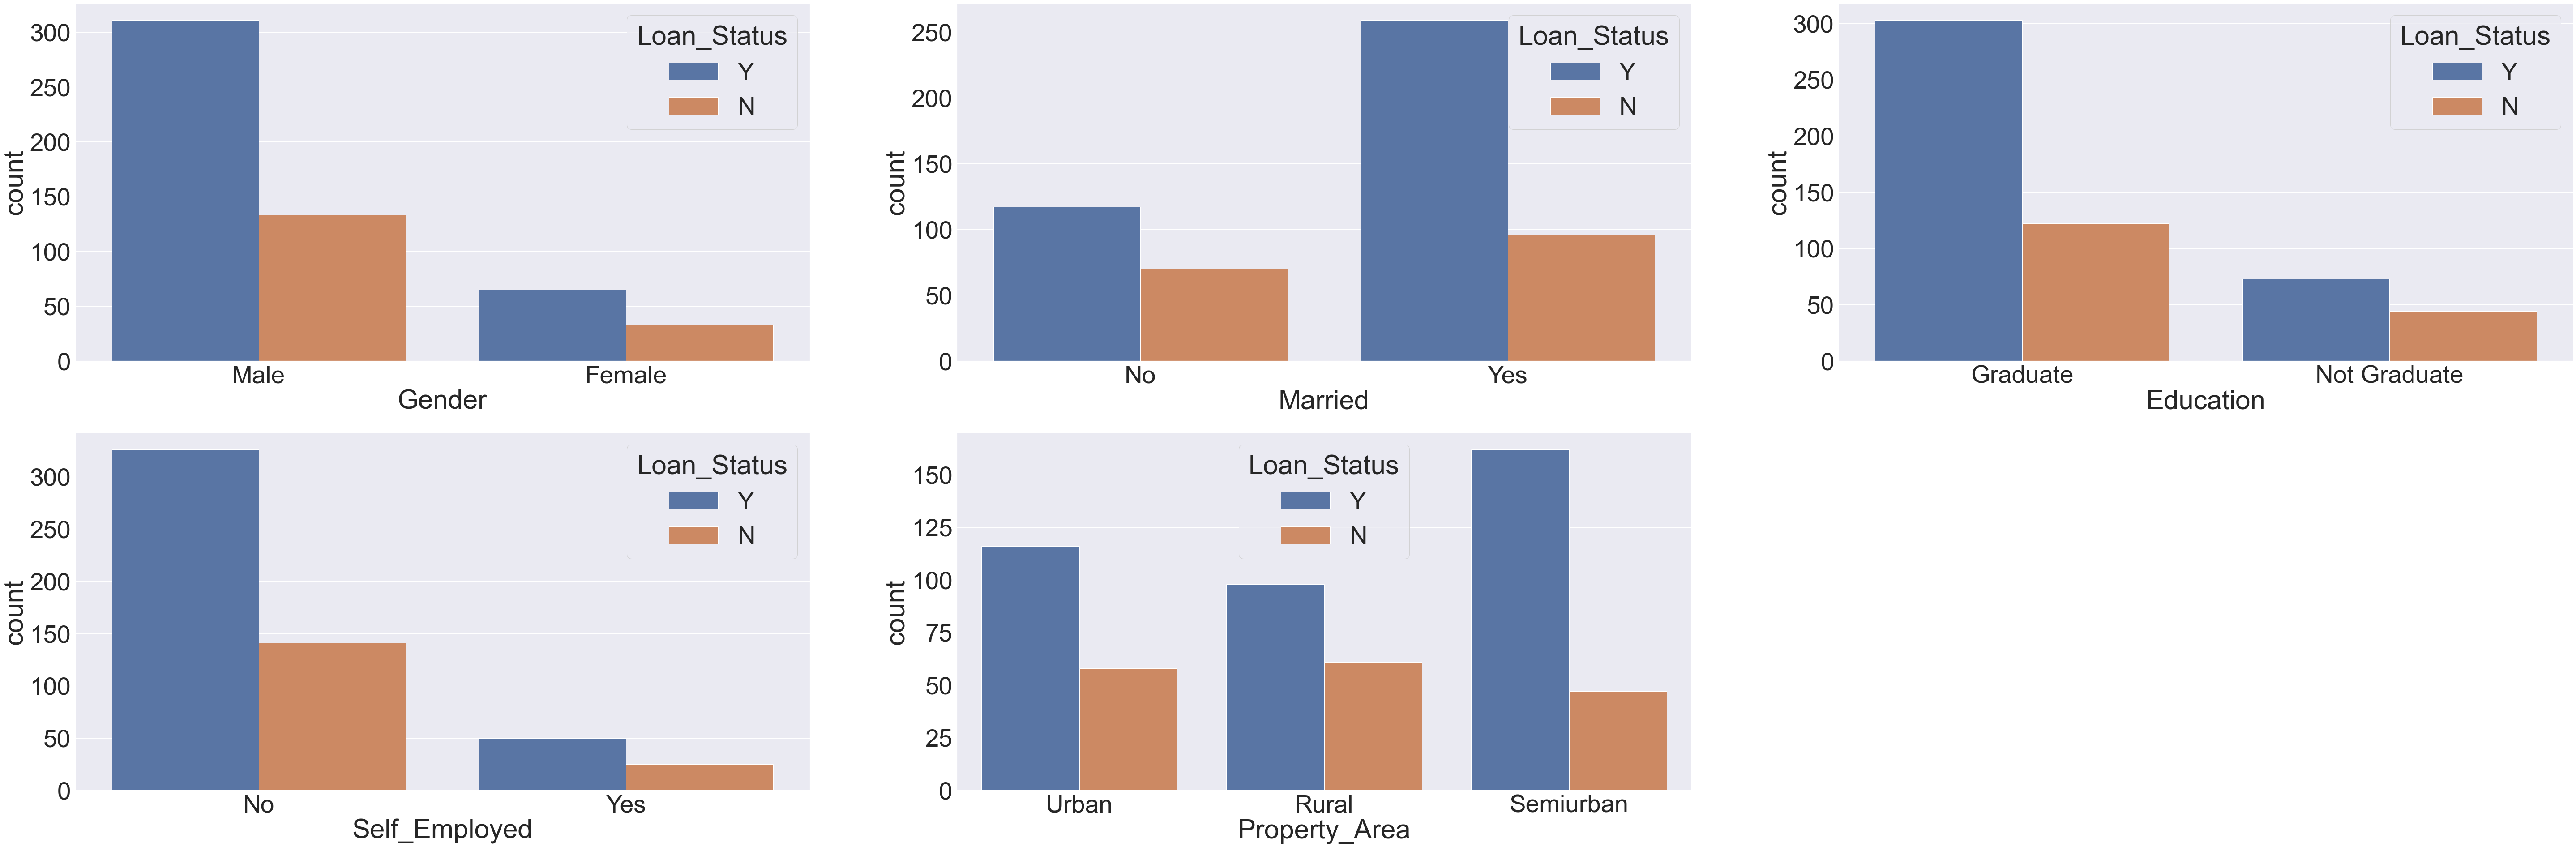

In [131]:
# comparison between different attributes and loan_status
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(3,3,1)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(3,3,2)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(3,3,3)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(3,3,4)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(3,3,5)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

In [132]:
# replace variable names from words to numerical values
df.Loan_Status = df.Loan_Status.map({'Y':1,'N':0})
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [133]:
df.Gender = df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [134]:
df.Married = df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [135]:
df.Dependents = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [136]:
df.Education = df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [137]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [138]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [139]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [140]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [141]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [142]:
#final DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## Phase 4: Training the Model

In [143]:
# Imports packages for classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [144]:
# splitting data into x and y
x = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [145]:
# let's include 30% of the data in the test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

lr_regression = model.predict(x_test)